In [2]:
import pickle as pkl
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
#from lmfit import Minimizer, Parameters, report_fit

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
## 1. supp_Figure_4b--- ---

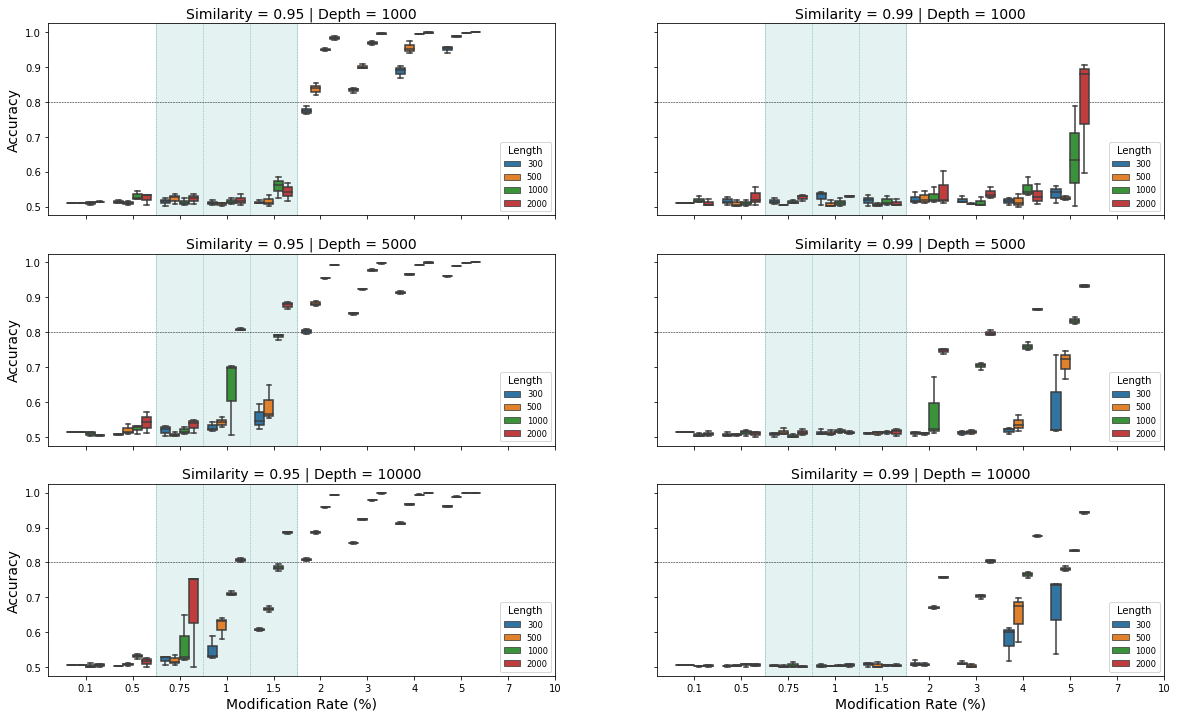

In [8]:
f_evaluation = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig4/Data/evaluation_all_bmm_high_similarity.txt"
df = pd.read_csv(f_evaluation,
                 names=["simulation", "method", "length", "depth", "mod_rate", 
                        "freq_code", "similarity", "cluster", "rep", "fpr", "acc", "fms", "ari", "ami"])
df = df[df['fpr'] == 0]
df = df[(df['length'] == 300) | (df['length'] == 500)| (df['length'] == 1000) | (df['length'] == 2000)] 
df.similarity.value_counts()

fig, ax = plt.subplots(3, 2, figsize=(20, 12), sharex=True, sharey=True)

for j, similarity in enumerate([0.95,0.99]):
    for no, depth in enumerate([1000, 5000,10000]):

        df_subset = df[(df.depth == depth) & (df.similarity == similarity)] # & (df.mod_rate.isin([0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]))]
        sns.boxplot(data=df_subset, x="mod_rate", y="acc", hue="length", ax=ax[no,j])
        
        ax[no,j].set_xlabel("")
        ax[no,j].set_ylabel("")
        ax[no,j].set_title("Similarity = %s | Depth = %s" % (similarity, depth), fontsize=14)
        ax[no,j].legend(loc="lower right", fontsize="small", title="Length")
        ax[no,j].axhline(0.8, linewidth=0.5, linestyle="--", color="black", zorder=-10)

        ax[no,j].axvspan(1.5, 4.5, color="teal", alpha=0.1, zorder=-10)
        for xline in (1.5, 2.5, 3.5, 4.5):
            ax[no,j].axvline(xline, color="teal", alpha=0.5, zorder=-10, linewidth=0.5, linestyle="--")

for i in range(3):
    ax[i,0].set_ylabel("Accuracy", fontsize=14)
    #ax[i,0].tick_params(labelsize=12)

for i in range(2):
    ax[-1,i].set_xlabel("Modification Rate (%)", fontsize=14)
    ax[-1,i].set_xticks(range(11))
    ax[-1,i].set_xticklabels(["0.1", "0.5", "0.75", "1", "1.5", "2", "3", "4", "5", "7", "10"])

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig4/Data/'
fig.savefig(dir_out+'Supp_Figure_4b_simulation_high_simi_BMM_cluster_accuracy.pdf',bbox_inches='tight')

In [ ]:
## 2. supp_Figure_4c--- ---

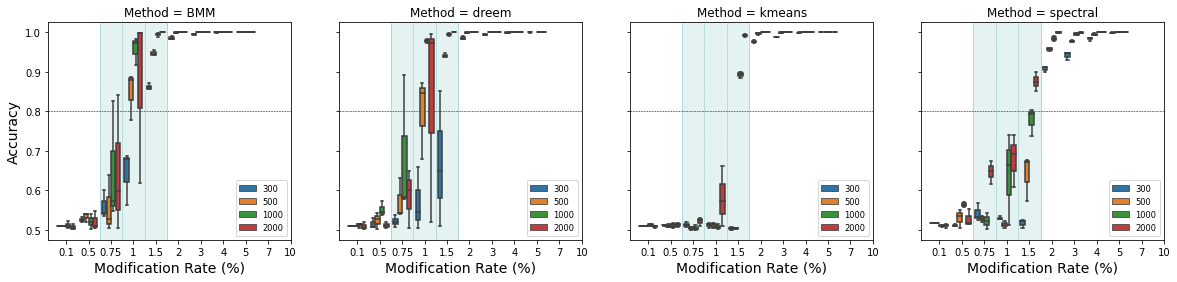

In [24]:
f_evaluation = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig4/Data/evaluate_diff_lengths_diff_methods.txt"
df = pd.read_csv(f_evaluation,
                 names=["simulation", "method", "length", "depth", "mod_rate", 
                        "freq_code", "similarity", "cluster", "rep", "fpr", "acc", "fms", "ari", "ami"])
df = df[df['fpr'] == 0]
df = df[(df['length'] == 300) | (df['length'] == 500)| (df['length'] == 1000) | (df['length'] == 2000)] 
df = df[(df['similarity'] == 0.75) & (df['depth'] == 1000)]

### plots --- ---

fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)

for j, method in enumerate(["BMM", "dreem", "kmeans", "spectral"]):
    
    df_subset = df[(df.depth == 1000) & (df.method == method)]
    sns.boxplot(data=df_subset, x="mod_rate", y="acc", hue="length", ax=ax[j])
    
    ax[j].set_xlabel("")
    ax[j].set_ylabel("")
    ax[j].set_title("Method = %s" % (method))
    ax[j].legend(loc="lower right", fontsize="small")
    ax[j].axhline(0.8, linewidth=0.5, linestyle="--", color="black", zorder=-10)

    ax[j].axvspan(1.5, 4.5, color="teal", alpha=0.1, zorder=-10)
    for xline in (1.5, 2.5, 3.5, 4.5):
        ax[j].axvline(xline, color="teal", alpha=0.5, zorder=-10, linewidth=0.5, linestyle="--")


ax[0].set_ylabel("Accuracy", fontsize=14)

for i in range(4):
    ax[i].set_xlabel("Modification Rate (%)", fontsize=14)
    ax[i].set_xticks(range(11))
    ax[i].set_xticklabels(["0.1", "0.5", "0.75", "1", "1.5", "2", "3", "4", "5", "7", "10"])

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig4/Data/'
fig.savefig(dir_out+'Supp_Figure_4c_simulation_diff_methods_long_reads_BMM_cluster_accuracy.pdf',bbox_inches='tight')